In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import analysis
import lmpsetup
import hmdsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis
import rgRPA

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

## Summary


**[1. RPA Testing](#1)**

**[2. HOOMD Testing](#2)**

**[3. SLAB Testing](#3)**

**[4. KH Testing](#4)**

### 1. RPA Testing <a id='1'></a>

In [51]:
d = rgRPA.rgRPA(seqname='Ddx4_N1', phiTop=0.2, phisTop=0.0, u=0.26)
d.run()

0.1 0.0
0.1 0.0
0.1 0.0 0.26
241


TypeError: only size-1 arrays can be converted to Python scalars

### 2. HOOMD Testing <a id='2'></a>

In [64]:
ts = np.linspace(280,330,4)
for t in ts:
    hmdsetup.HMDSetup(protein='CPEB4', 
                      oliba_wd='/home/adria/irb/hoomd/new_test', 
                      chains=20, 
                      save=50000,
                      t=int(1e9),
                      processors=1,
                      hps_scale=0.8,
                      model='HPS-T',
                      temperature=t).write_hps_files()

In [60]:
ts = np.linspace(280,330,4)
lmpsetup.LMPSetup(protein='CPEB4', 
                  oliba_wd='/home/adria/perdiux/hmdcompare/slab/WT', 
                  host='@perdiu41',
                  chains=20, 
                  save=50000,
                  t=int(1e9),
                  processors=4,
                  slab=True,
                  random=True,
                  model='HPS-T',
                  hps_scale=0.8,
                  temperatures=ts).write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/hmdcompare/slab/WT for CPEB4     ║
║---------------------------------------------------------------------------------║
║   PARAMETERS                                                                    ║
║       - Model = HPS-T                                                           ║
║       - Chains = 20                                                             ║
║       - Ionic Strength (mM) = 0.1                                               ║
║       - Medium Permittivity = 80.0                                              ║
║       - Temperatures (K) = [280.         296.66666667 313.33333333 330.        ]    ║
║       - HPS Scale = 0.8                                                         ║
╚═════════════════════════════════════════════════════════════════════════════════╝


In [32]:
temperatures = [300,325,350,375]
for temp in temperatures:
    hmdsetup.HMDSetup(temperature=temp,
                      protein='CspTm',
                      debye=0.1,
                      oliba_wd='/home/adria/irb/hoomd/csp2', 
                      save=50000,
                      t=int(1e9),
                      slab=False,
                      model='HPS-T').write_hps_files()

In [31]:
temperatures = [300,325,350,375]
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CspTm',
                  debye=0.1,
                  oliba_wd='/home/adria/lmp-ref', 
                  save=50000,
                  t=int(1e9),
                  slab=False,
                  model='HPS-T').write_hps_files()

╔══════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/lmp-ref for CspTm     ║
║--------------------------------------------------------------║
║   PARAMETERS                                                 ║
║       - Model = HPS-T                                        ║
║       - Chains = 1                                           ║
║       - Ionic Strength (mM) = 0.1                            ║
║       - Medium Permittivity = 80.0                           ║
║       - Temperatures (K) = [300, 325, 350, 375]              ║
║       - HPS Scale = 1.0                                      ║
╚══════════════════════════════════════════════════════════════╝


In [15]:
temperatures = [300,325,350,375]
rgs = np.zeros_like(temperatures)
for ti in range(len(temperatures)):
    tr = md.load(f'/home/adria/irb/hoomd/csp/trajectory_{temperatures[ti]}.dcd', top='/home/adria/irb/hoomd/csp/topo.pdb')
    rgs[ti] = md.compute_rg(tr).mean(axis=0)*10.

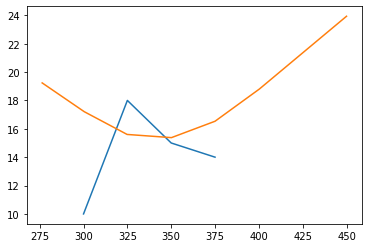

In [21]:
plt.plot(temperatures, rgs)
dig = np.genfromtxt('/home/adria/documents/csp.txt')
plt.plot(dig[:,0], dig[:,1]*10.)

### 3. SLAB testing <a id='3'></a>

In [155]:
temperatures = [280, 290, 300, 310]
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/HPS-T/LongSlabs/12D',
                      host=f'@perdiu42',
                      protein='12D_CPEB4_D4',
                      chains=30, 
                      model='HPS-T',
                      save=50000,
                      t=int(1e9),
                      processors=5,
                      hps_scale=0.75,
                      water_perm=50,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files(silent=True)


lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/HPS-T/LongSlabs/D4',
                  host=f'@perdiu45',
                  protein='CPEB4_D4',
                  chains=30, 
                  model='HPS-T',
                  save=50000,
                  t=int(1e9),
                  processors=5,
                  hps_scale=0.75,
                  water_perm=50,
                  temperatures=temperatures,
                  debye=0.1).write_hps_files(silent=True)

162.04664119267213
162.04664119267213


Build FUS PS

In [3]:
plot_data = [
[0, 0.8412596401028278],
[0, 0.8714652956298201],
[0, 0.8997429305912596],
[1.4925373134328765, 0.9286632390745502],
[8.95522388059706, 0.9582262210796915],
[26.865671641791067, 0.9877892030848329],
]

In [ ]:
plot_data = [
[0, 0.8412596401028278],
[0, 0.8714652956298201],
[0, 0.8997429305912596],
[1.4925373134328765, 0.9286632390745502],
[8.95522388059706, 0.9582262210796915],
[26.865671641791067, 0.9877892030848329],
]

temperatures_FUS = np.array(plot_data)[:,1]*344.4
print(temperatures_FUS)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/FUS_TEST',
                      host=f'@perdiu46',
                      protein='FUS',
                      chains=100, 
                      model='HPS',
                      save=50000,
                      t=int(1e9),
                      slab=True,
                      use_random=True,
                      processors=6,
                      temperatures=temperatures_FUS,
                      debye=0.1).write_hps_files()

[289.72982005 300.13264781 309.8714653  319.83161954 330.01311054
 340.19460154]


> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Interface fit failed for negative z, returning 0 (no interface) !!!
> Interface fit failed for negative z, returning 0 (no interface) !!!


/home/adria/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


> Interface fit failed for negative z, returning 0 (no interface) !!!


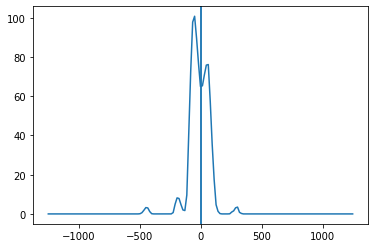

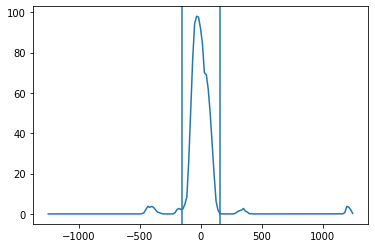

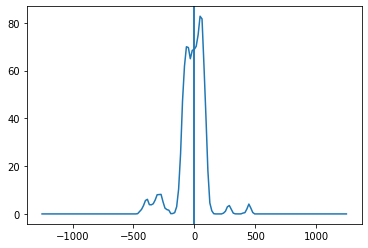

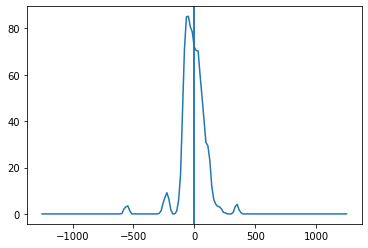

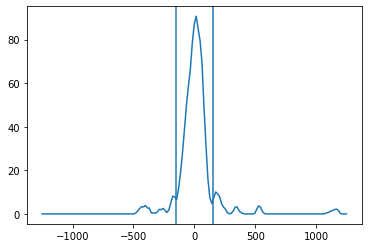

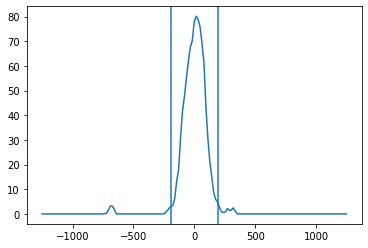

In [29]:
r = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST', equil_frames=20)
for T in range(len(r.temperatures)):
    rhos = r.density_profile(T=T)
    idx = r.interface_position(rhos[0], rhos[1].mean(axis=0))
    plt.figure()
    plt.plot(rhos[0], rhos[1].mean(axis=0))
    plt.axvline(idx[0])
    plt.axvline(idx[1]) 

In [160]:
rhos[1].shape

(178, 157)

> Taking frames every 1 for a total of 10000 to avoid strong correlations


/home/adria/scripts/lammps/lammps/analysis.py:1050: RuntimeWarning: invalid value encountered in true_divide
  condensed_densities.append(mass_condensed / volume_condensed)


[289. 299. 309. 319. 330. 339.]
[289. 289. 299. 300. 309. 310. 319. 319. 330. 330. 339. 340.]
[0.2525558  0.22410283 0.17211338        nan 0.20013673 0.24809148]
[0.00120225 0.00176338 0.00175125 0.0243052  0.00218343 0.00105749]


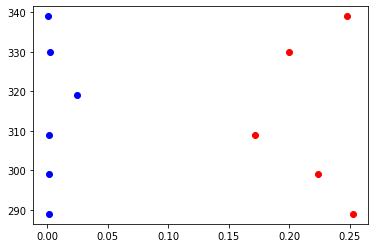

In [169]:
r = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST', equil_frames=20)
rhos = r.phase_diagram()

print(r.temperatures[::2])
print(r.temperatures)
rho_c = rhos[1].mean(axis=1)
rho_d = rhos[0].mean(axis=1)
print(rho_c[::2])
print(rho_d[::2])
plt.plot(rho_c[::2], r.temperatures[::2], 'ro')
plt.plot(rho_d[::2], r.temperatures[::2], 'bo')

In [80]:
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/WT')
t.save_last_frame()

> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [83]:
t = md.load('/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/WT/dcd_traj_4.dcd', top='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/WT/topo.pdb')

In [85]:
t[140].save_pdb('/home/adria/slab.pdb')

### 4. KH testing <a id='4'></a>


In [272]:
temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/KH/WT',
                      host=f'@perdiu46',
                      protein='CPEB4',
                      chains=1, 
                      model='KH',
                      save=50000,
                      t=int(1e9),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/KH/D4',
                      host=f'@perdiu40',
                      protein='CPEB4_D4',
                      chains=1, 
                      model='KH',
                      save=50000,
                      t=int(1e9),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

#-------------------------

temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/HPS/WT',
                      host=f'@perdiu46',
                      protein='CPEB4',
                      chains=1, 
                      model='HPS',
                      save=50000,
                      t=int(1e9),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

temperatures = np.linspace(280,400,8)
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/HPS/D4',
                      host=f'@perdiu34',
                      protein='CPEB4_D4',
                      chains=1, 
                      model='HPS',
                      save=50000,
                      t=int(1e9),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/KH/WT for CPEB4     ║
║------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                   ║
║       - Model = KH                                                                             ║
║       - Chains = 1                                                                             ║
║       - Ionic Strength (mM) = 0.1                                                              ║
║       - Medium Permittivity = 80.0                                                             ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                          

In [12]:
wt_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/KH/WT')
wt_kh_rg = wt_kh.rg()
d4_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/KH/D4')
d4_kh_rg = d4_kh.rg()
# wt_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/HPS/WT')
# wt_hps_rg = wt_hps.rg()
d4_hps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/vsHPS/HPS/D4')
d4_hps_rg = d4_hps.rg()

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


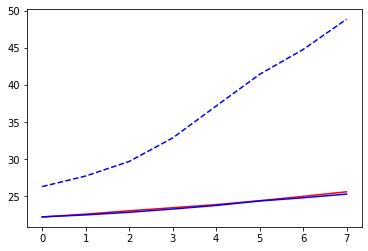

In [13]:
plt.plot(wt_kh_rg.mean(axis=1), 'r')
plt.plot(d4_kh_rg.mean(axis=1), 'b')
# plt.plot(wt_hps_rg.mean(axis=1), '--r')
plt.plot(d4_hps_rg.mean(axis=1), '--b')

### Test with alpha-synuclein...

In [28]:
temperatures = np.linspace(280,400,4)
asyn = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/asyn-test2/Mine',
                      host=f'@perdiu37',
                      protein='ASYN',
                      chains=1, 
                      model='KH',
                      save=10000,
                      t=int(1e8),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1)
asyn.write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/asyn-test2/Mine for ASYN     ║
║-----------------------------------------------------------------------------║
║   PARAMETERS                                                                ║
║       - Model = KH                                                          ║
║       - Chains = 1                                                          ║
║       - Ionic Strength (mM) = 0.1                                           ║
║       - Medium Permittivity = 80.0                                          ║
║       - Temperatures (K) = [280. 320. 360. 400.]                            ║
║       - HPS Scale = 1.0                                                     ║
╚═════════════════════════════════════════════════════════════════════════════╝


In [23]:
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/asyn-test/Dignon', equil_frames=0)
t.structures
# t2 = analysis.Analysis(oliba_wd='/home/adria/perdiux/asyn-test/Mine')

> Taking frames every 1 for a total of 10000 to avoid strong correlations


[<mdtraj.Trajectory with 2 frames, 140 atoms, 1 residues, and unitcells at 0x7f1ed4367a50>,
 <mdtraj.Trajectory with 2 frames, 140 atoms, 1 residues, and unitcells at 0x7f1ee05c3290>,
 <mdtraj.Trajectory with 2 frames, 140 atoms, 1 residues, and unitcells at 0x7f1ee05c3250>,
 <mdtraj.Trajectory with 2 frames, 140 atoms, 1 residues, and unitcells at 0x7f1ed8867650>]

In [27]:
rgs = []
for Temp in [280,320,360,400]:
    t = md.load(f'/home/adria/perdiux/asyn-test/Dignon/A-syn_KH.{Temp}.dcd', top=f'/home/adria/perdiux/asyn-test/Dignon/data_trj.pdb')
    print(t)
    rgs.append(md.compute_rg(t).mean()*10.)

<mdtraj.Trajectory with 10001 frames, 140 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 2 frames, 140 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 10001 frames, 140 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 10001 frames, 140 atoms, 1 residues, and unitcells>


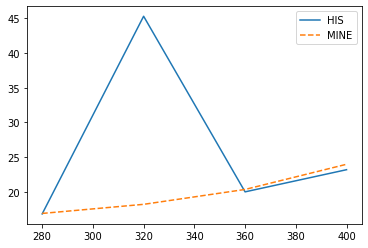

In [26]:
plt.plot(t2.temperatures, rgs, label='HIS')
plt.plot(t2.temperatures, t2.rg().mean(axis=1),'--', label='MINE')
plt.legend()

In [36]:
temperatures = [300,325,350,375]
for temp in temperatures:
    hmdsetup.HMDSetup(temperature=temp,
                      protein='CspTm',
                      debye=0.1,
                      oliba_wd='/home/adria/irb/hoomd/csp', 
                      save=50000,
                      t=int(1e9),
                      slab=False,
                      model='HPS-T').write_hps_files()

In [262]:
ks = pd.read_csv('/home/adria/scripts/data/hps/kh.dat', sep=" ", index_col=0)
ks2 = pd.read_csv('/home/adria/scripts/data/hps/kh.dat', sep=" ", index_col=0)
dd = np.zeros(shape=(20,20))
dd[np.triu_indices(20)] = ks.values[np.triu_indices(20)]
dd[np.tril_indices(20)] = dd.T[np.tril_indices(20)]

print(ks2.values[np.tril_indices(20)].shape)
ks2.values[:,:] = dd[:,:]

(210,)


In [267]:
ks2

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Res,,,,,,,,,,,,,,,,,,,,
A,-0.142,-0.257,-0.004,0.022,-0.425,-0.087,-0.100,-0.393,0.049,-0.438,-0.307,-0.023,-0.049,-0.030,-0.022,-0.046,-0.088,-0.320,-0.291,-0.228
C,-0.257,-0.510,-0.100,-0.081,-0.558,-0.201,-0.261,-0.518,-0.038,-0.562,-0.449,-0.124,-0.189,-0.160,-0.122,-0.161,-0.195,-0.445,-0.443,-0.337
D,-0.004,-0.100,0.062,0.088,-0.245,0.011,-0.088,-0.203,-0.001,-0.234,-0.122,-0.001,0.046,0.028,-0.084,0.005,-0.018,-0.110,-0.158,-0.147
E,0.022,-0.081,0.088,0.103,-0.256,0.061,-0.065,-0.216,-0.018,-0.260,-0.165,0.022,0.055,0.034,-0.081,0.026,-0.009,-0.135,-0.178,-0.151
F,-0.425,-0.558,-0.245,-0.256,-0.756,-0.333,-0.419,-0.699,-0.228,-0.758,-0.661,-0.281,-0.349,-0.329,-0.312,-0.318,-0.353,-0.625,-0.607,-0.539
G,-0.087,-0.201,0.011,0.061,-0.333,-0.077,-0.065,-0.285,0.070,-0.337,-0.233,-0.009,-0.027,0.001,-0.007,-0.020,-0.055,-0.231,-0.237,-0.181
H,-0.100,-0.261,-0.088,-0.065,-0.419,-0.065,-0.187,-0.334,0.043,-0.388,-0.312,-0.055,-0.078,-0.042,-0.066,-0.059,-0.101,-0.258,-0.312,-0.250
I,-0.393,-0.518,-0.203,-0.216,-0.699,-0.285,-0.334,-0.658,-0.181,-0.726,-0.588,-0.212,-0.283,-0.270,-0.265,-0.250,-0.319,-0.592,-0.556,-0.484
K,0.049,-0.038,-0.001,-0.018,-0.228,0.070,0.043,-0.181,0.210,-0.230,-0.110,0.062,0.095,0.051,0.146,0.084,0.049,-0.111,-0.138,-0.126


In [268]:
d = ks2.to_csv(sep=' ')
with open('/home/adria/scripts/data/hps/kh2.dat', 'w+') as fin:
    fin.write(d)

In [264]:
ks

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Res,,,,,,,,,,,,,,,,,,,,
A,-0.142,-0.257,-0.004,0.022,-0.425,-0.087,-0.100,-0.393,0.049,-0.438,-0.307,-0.023,-0.049,-0.030,-0.022,-0.046,-0.088,-0.320,-0.291,-0.228
C,0.000,-0.510,-0.100,-0.081,-0.558,-0.201,-0.261,-0.518,-0.038,-0.562,-0.449,-0.124,-0.189,-0.160,-0.122,-0.161,-0.195,-0.445,-0.443,-0.337
D,0.000,0.000,0.062,0.088,-0.245,0.011,-0.088,-0.203,-0.001,-0.234,-0.122,-0.001,0.046,0.028,-0.084,0.005,-0.018,-0.110,-0.158,-0.147
E,0.000,0.000,0.000,0.103,-0.256,0.061,-0.065,-0.216,-0.018,-0.260,-0.165,0.022,0.055,0.034,-0.081,0.026,-0.009,-0.135,-0.178,-0.151
F,0.000,0.000,0.000,0.000,-0.756,-0.333,-0.419,-0.699,-0.228,-0.758,-0.661,-0.281,-0.349,-0.329,-0.312,-0.318,-0.353,-0.625,-0.607,-0.539
G,0.000,0.000,0.000,0.000,0.000,-0.077,-0.065,-0.285,0.070,-0.337,-0.233,-0.009,-0.027,0.001,-0.007,-0.020,-0.055,-0.231,-0.237,-0.181
H,0.000,0.000,0.000,0.000,0.000,0.000,-0.187,-0.334,0.043,-0.388,-0.312,-0.055,-0.078,-0.042,-0.066,-0.059,-0.101,-0.258,-0.312,-0.250
I,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.658,-0.181,-0.726,-0.588,-0.212,-0.283,-0.270,-0.265,-0.250,-0.319,-0.592,-0.556,-0.484
K,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.210,-0.230,-0.110,0.062,0.095,0.051,0.146,0.084,0.049,-0.111,-0.138,-0.126
